# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [2]:
#import the necessary libraries
# your code here
import pandas as pd
from pandas import Series
from pandas import Grouper
import numpy as np
from numpy import random
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [3]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range(start='1/1/2017', end='03/31/2018')
num_dates = len(dates)

In [5]:
# store the parameters
mu = 5
y_0 = 8
std = 2
phi = 0.7

In [15]:
# generate the time series according to the formula
ts = Series(data = [y_0], index = [dates[0]])
print(ts[0])
for i in range(1,num_dates):
    next_val = mu + phi*(ts[i-1] - mu) + np.random.normal(loc = 0, scale=std) 
    ts = ts.append(Series(data = [next_val] , index = [dates[i]]))
print(ts.head())

8
2017-01-01    8.000000
2017-01-02    9.508794
2017-01-03    5.840869
2017-01-04    6.829932
2017-01-05    2.337970
dtype: float64


Plot the time series and verify what you see

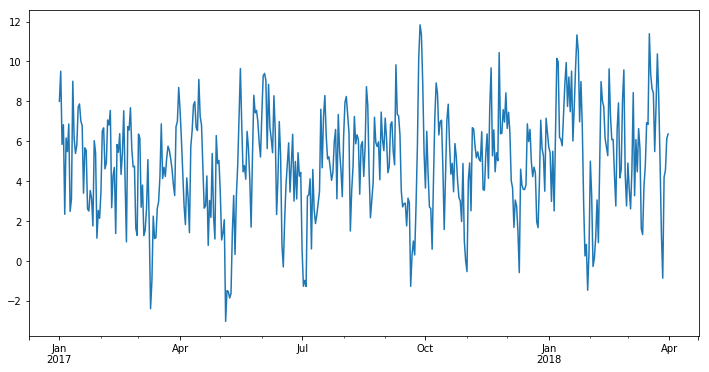

In [17]:
# plot here
ts.plot(figsize=(12,6))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

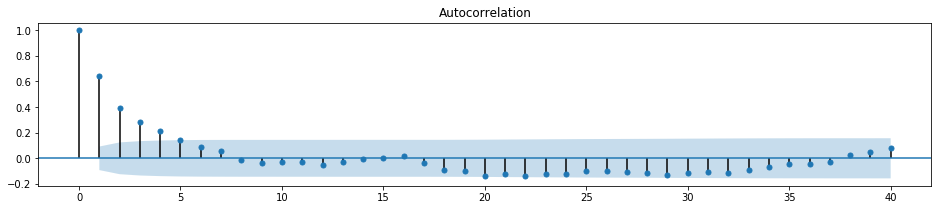

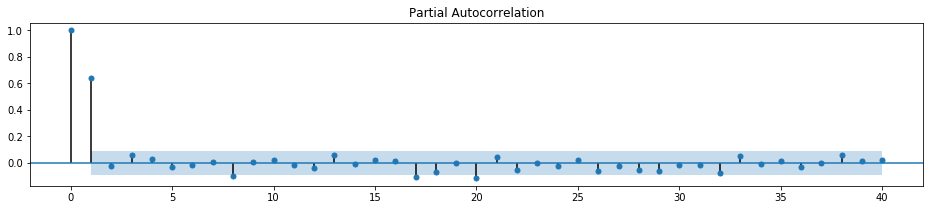

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [19]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -965.325
Method:                       css-mle   S.D. of innovations              2.018
Date:                Thu, 21 Mar 2019   AIC                           1936.651
Time:                        11:15:16   BIC                           1949.012
Sample:                    01-01-2017   HQIC                          1941.521
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9369      0.262     18.824      0.000       4.423       5.451
ar.L1.y        0.6407      0.036     17.816      0.000       0.570       0.711
                                    Roots           

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\david\A

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [21]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range(start='4/1/2015', end='8/31/2015')
num_dates = len(dates)

# store the parameters
mu = 7
std = 4
theta = 0.9

#generate the time series
# generate the time series according to the formula
old_err = np.random.normal(loc = 0, scale=std)
ts = Series(data = [mu + old_err], index = [dates[0]])
print(ts[0])
for i in range(1,num_dates):
    new_err = np.random.normal(loc = 0, scale=std)
    next_val = mu + new_err + theta*old_err
    ts = ts.append(Series(data = [next_val] , index = [dates[i]]))
    old_err = new_err
print(ts.head())

8.885740654929972
2015-04-01     8.885741
2015-04-02     3.933264
2015-04-03     8.443315
2015-04-04    10.907138
2015-04-05     2.992098
dtype: float64


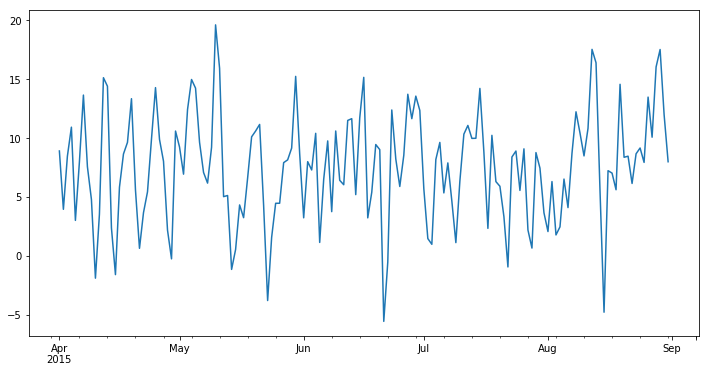

In [23]:
# Plot the time series
ts.plot(figsize=(12,6))

## Look at the ACF and PACF of your model and write down your conclusions

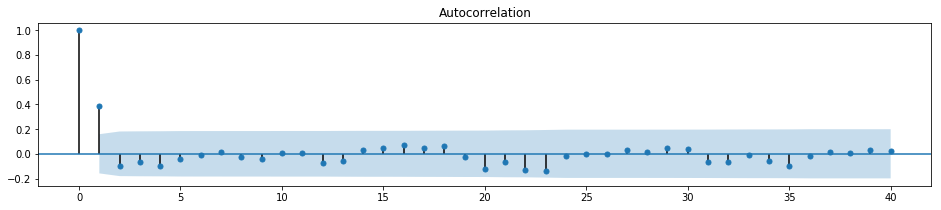

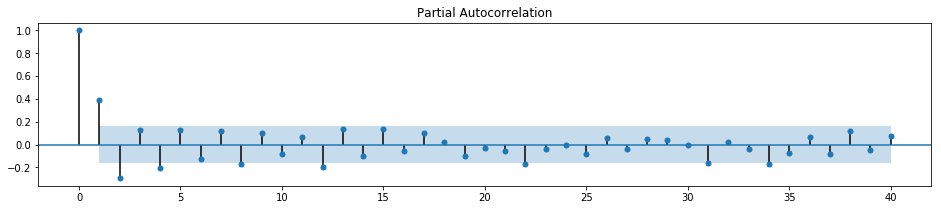

In [24]:
# plots here
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts,ax=ax, lags=40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [25]:
# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(ts, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.916
Method:                       css-mle   S.D. of innovations              3.897
Date:                Thu, 21 Mar 2019   AIC                            857.832
Time:                        11:23:38   BIC                            866.924
Sample:                    04-01-2015   HQIC                           861.525
                         - 08-31-2015                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5167      0.589     12.763      0.000       6.362       8.671
ma.L1.y        0.8753      0.050     17.634      0.000       0.778       0.973
                                    Roots           

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [38]:
# the data is in "winning_400m.csv"
df = pd.read_csv('winning_400m.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('year')
ts = df['winning_times']
ts.head()

year
1900-01-01    49.4
1904-01-01    49.2
1908-01-01    50.0
1912-01-01    48.2
1920-01-01    49.6
Name: winning_times, dtype: float64

Plot the data

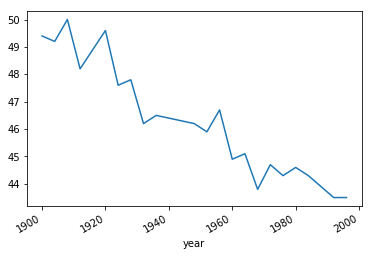

In [36]:
# your code here
ts.plot()

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [39]:
# your code here
ts_diff = ts.diff(periods=1).dropna()
ts_diff.head()

year
1904-01-01   -0.2
1908-01-01    0.8
1912-01-01   -1.8
1920-01-01    1.4
1924-01-01   -2.0
Name: winning_times, dtype: float64

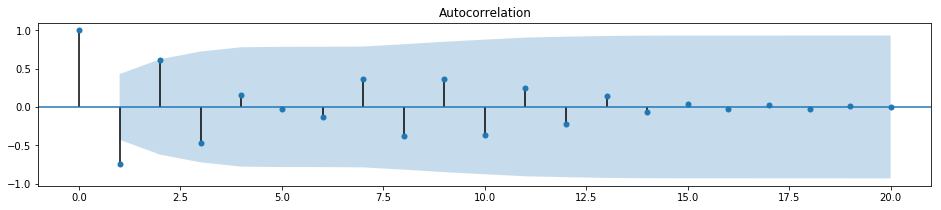

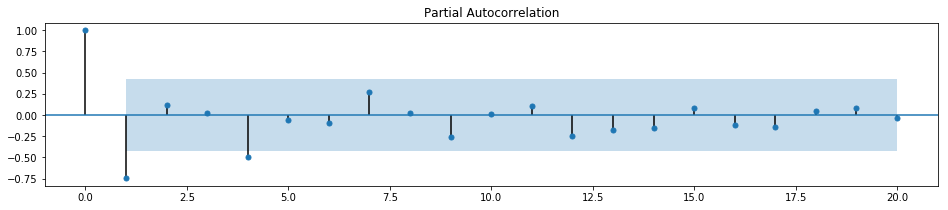

In [42]:
# Look at ACF and PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(ts_diff,ax=ax, lags=20);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(ts_diff,method='ywm',ax=ax, lags=20);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [54]:
# your code here
mod_arma = ARMA(ts_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Thu, 21 Mar 2019   AIC                             46.107
Time:                        11:40:02   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eithe

In [55]:
# your code here
mod_arma = ARMA(ts_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

C:\Users\david\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 21 Mar 2019   AIC                             44.943
Time:                        11:40:09   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_ti

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.